In [1]:
## Is it possible to categorise/cluster variables?

In [2]:
dataset_name = "W19_comb"
df_list = 'BES_Panel|BES_reduced'

# 'BES_Panel|BES_reduced'
#           ]#,"BESnumeric"]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

Toggle code

In [3]:
## easiest exploratory options?

## PCA/FA on dataset

# tedious looking for this - make a function!!!

In [4]:
Treatment = "Trying To Categorise Variables"
output_folder = "C:\\Users\\Marios\\Documents\\GitHub\\BES_analysis\\output\\BES_analysis_output"
output_subfolder = output_folder + Treatment + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )

In [19]:
input_df = BES_reduced.T

input_df = input_df.sample(frac=.1,axis=1)

decomp_index = input_df.index
decomp_columns = input_df.columns

decomp_columns = [str(x) for x in decomp_columns]

clean_feature_set_std = StandardScaler().fit_transform(input_df.values )
decomp_std = pd.DataFrame(   clean_feature_set_std,
                             columns = decomp_columns,
                             index   = decomp_index     )

In [25]:
%%time
# n_components = decomp_std.shape[1]
n_components = 4
# (svd_solver='full', n_components='mle',whiten=True)
# decomp = PCA(n_components = n_components,svd_solver='full')
# decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
# decomp = SparsePCA(n_components=n_components, alpha=1,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
#
# alpha=2 -> 1hr

decomp = PCA(n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
# decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(decomp_std)


Wall time: 860 ms


In [44]:
%%time
# n_components = decomp_std.shape[1]
n_components = 10
# (svd_solver='full', n_components='mle',whiten=True)
# decomp = PCA(n_components = n_components,svd_solver='full')
# decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
# decomp = SparsePCA(n_components=n_components, alpha=1,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
#
# alpha=2 -> 1hr

decomp = FactorAnalysis(n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
# decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(decomp_std)


Wall time: 7.39 s


In [7]:
# %%time
# # 5 mins
# ## RUN (some variant of) PCA (potentially v slow!)
# n_components = decomp_std.shape[1]
# n_components = 4
# # (svd_solver='full', n_components='mle',whiten=True)
# # decomp = PCA(n_components = n_components,svd_solver='full')
# # decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
# #     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
# # decomp = SparsePCA(n_components=n_components, alpha=1,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
# #
# # alpha=2 -> 1hr

# decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
# decomp_method = str(decomp).split("(")[0] 
# # ,n_components=30

# X_r = decomp.fit_transform(decomp_std)

# BES_decomp = pd.DataFrame(   X_r,
#                              columns = range(0,n_components),
#                              index   = decomp_index)

# import pickle
# # treatdir = BES_data_folder+Treatment
# # subdir = BES_data_folder+Treatment+decomp_method
# load_suff = "FactorAnalysis"
# save = True # False => Load

# if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
#     decomp_method = str(decomp).split("(")[0] 
#     subdir = output_subfolder + decomp_method
#     fname = subdir+ os.sep + decomp_method
#     # create dir, save decomp object, BES_decomp, BES_std    
# #     if not os.path.exists(subdir): os.makedirs(subdir)
# #     with open(fname+".pkl", "wb") as f: pickle.dump( decomp, f )
# #     BES_decomp.to_hdf(fname+".hdf"        , decomp_method)
# #     decomp_std.to_hdf(   fname+"_std"+".hdf" , decomp_method)
    
# # else: # LOAD decomp results (default is SAVE)
# #     decomp_method = load_suff
# #     subdir = output_subfolder + os.sep + decomp_method    
# #     fname = subdir + os.sep + decomp_method
# #     if not os.path.exists(subdir): raise Exception(subdir + ' does not exist!')
# #     # load decomp object, BES_decomp, BES_std, n_components
# #     with open(fname+".pkl", "rb") as f: decomp = pickle.load(f) 
# #     BES_decomp = pd.read_hdf(fname+".hdf")
# #     decomp_std    = pd.read_hdf(fname+"_std"+".hdf")
# #     n_components = decomp.components_.shape[0] 

# # (BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
# #                                                           decomp_columns, BES_decomp, manifest=None, 
# #                                                           save_folder = subdir,  
# #                                                           show_first_x_comps= 4, show_histogram = False)

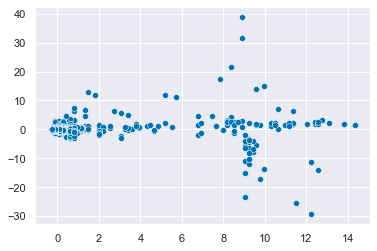

In [45]:
sns.scatterplot(x=X_r[:,0],y=X_r[:,1])

In [46]:
X_r = pd.DataFrame(X_r,index = decomp_index)

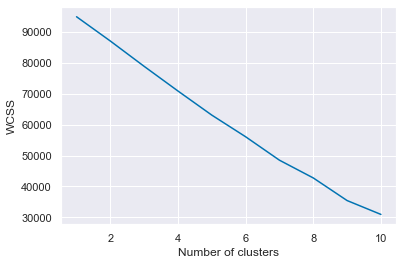

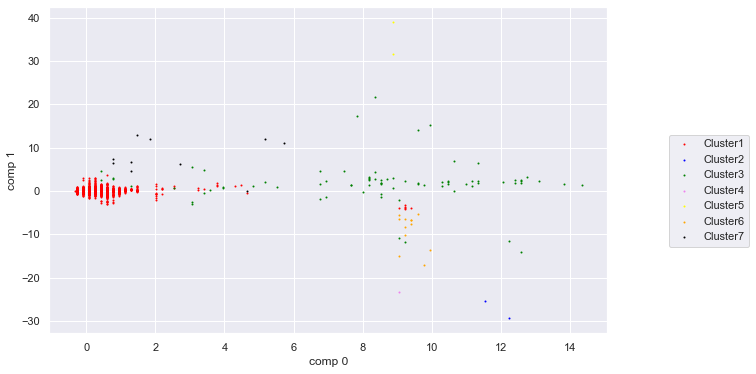

0    9415
2      78
5      12
6      10
1       2
4       2
3       1
dtype: int64

In [47]:
# %%time
n_clusters = 7


# X = df_simp_imp
X = X_r
#.apply(lambda x: x.cat.codes if x.dtype=='category' else x)

# values_x = pan_dataset_allr_values.columns[0]
# values_y = pan_dataset_allr_values.columns[1]
# value_df = pan_dataset_allr_values.loc[X.index]

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

# X.columns = [0,1]
# X = X.values

kmeans = KMeans(n_clusters = n_clusters, init = "k-means++", random_state = 42)
y = kmeans.fit_predict(X)

colour_list=  ['red','blue','green','violet','yellow','orange','black']

# plt.figure(figsize=(10,6));
# for cluster in range(0,n_clusters):
#     plt.scatter(value_df.loc[y == cluster, values_x], value_df.loc[y == cluster, values_y],
#                 s = 1, c = colour_list[cluster], label = 'Cluster'+str(cluster+1))
    
# plt.xlabel(pan_dataset_allr_values.columns[0])
# plt.ylabel(pan_dataset_allr_values.columns[1])
# plt.legend(bbox_to_anchor =(1.1,.625)) 

plt.figure(figsize=(10,6));
for cluster in range(0,n_clusters):
    plt.scatter(X.loc[y == cluster, X.columns[0]], X.loc[y == cluster, X.columns[1]],
                s = 1, c = colour_list[cluster], label = 'Cluster'+str(cluster+1))
    
plt.xlabel("comp 0")
plt.ylabel("comp 1")
plt.legend(bbox_to_anchor =(1.1,.625)) 

plt.show()
pd.Series(y).value_counts()

In [35]:
X_r

,0,1,2,3
turnoutUKGeneralW1__Very likely that I will vote,0.425386,-0.057966,-0.166734,-0.238413
turnoutUKGeneralW2__Very likely that I will vote,0.425386,-0.036995,-0.152070,-0.183002
turnoutUKGeneralW3__Very likely that I will vote,0.425386,-0.023844,-0.142822,-0.088490
turnoutUKGeneralW4__Very likely that I will vote,0.425386,-0.020015,-0.202946,-0.070820
turnoutUKGeneralW5__Very likely that I will vote,0.425386,0.003908,-0.100013,0.006484
...,...,...,...,...
responsibleEducationNoneW3_Yes,-0.279109,-0.033952,-0.033328,-0.001690
achieveReduceImmigLabW18_Yes,-0.279109,0.014103,-0.031150,-0.064046
achieveReduceImmigConW18_Yes,-0.279109,-0.151799,0.039227,-0.204112
partyContactConW3_Yes,-0.279109,-0.068743,-0.038189,-0.050379


In [36]:
X_r[y==6].index

Index(['winConstituencyLabW17__100 - Very likely to win', 'winConstituencyLabW18__100 - Very likely to win'], dtype='object')

In [37]:
X_r[y==4].index

Index(['ageW1', 'ageW7', 'ageW8', 'ageW9', 'ageW11', 'ageW12', 'ageW13',
       'ageW14', 'ageW16', 'ageW17', 'ageW18', 'ageW19', 'ageW2', 'ageW3',
       'ageW4', 'ageW5', 'ageW6', 'ageW10', 'ageW15'],
      dtype='object')

In [43]:
X_r[y==5].index

Index(['scotRefExpectationW1__100 - Scotland will definitely choose independence',
       'scotRefExpectationTurnoutW1__100% of people will vote',
       'scotRefExpectationW2__100 - Scotland will definitely choose independence',
       'scotRefExpectationTurnoutW2__100% of people will vote', 'mapTurnoutW3',
       'mapConW3', 'mapLabW3', 'mapWorkingClassW3', 'mapMiddleClassW3',
       'mapWhiteW3', 'winConstituencySNPW4__100 - Very likely to win',
       'winConstituencySNPW5__100 - Very likely to win',
       'euRefExpectationW7__100 - UK will definitely vote to leave the EU',
       'warmDenmarkW7__Very warm', 'warmFranceW7__Very warm',
       'warmPolandW7__Very warm', 'warmRomaniaW7__Very warm',
       'warmGreeceW7__Very warm', 'warmSpainW7__Very warm',
       'warmUKW7__Very warm',
       'euRefExpectationW8__100 - UK will definitely vote to leave the EU',
       'winConstituencyConW10__100 - Very likely to win',
       'winConstituencyLabW10__100 - Very likely to win',
       '

In [ ]:
## some signs that it's working a bit!